

***Double Slit Experiment Simulator***
---

**Description**
Simulator of the double slit experiment to better visualize a wave-particle duality concept.

**Project Structure**

Part 1: [Coding the simulator]

Part 2: [Using the Double Slit Experiment Simulator]

Part 3: [Modifying the Double Slit Experiment Simulator]




$Part\; 1: Coding\; the\; Simulator.$


In [ ]:
#Run this block of code before the others, to successfully import libraries and identify the functions and classes.

import matplotlib.pyplot as plt
import numpy as np
import scipy

class waveFunction():
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d
    self.distance_to_screen = distance_to_screen
    self.measure_slit= measure_slit
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]
  def evaluate(self,x):
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  def measure(self):
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

class doubleSlit():
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist
    self.distance_to_screen = distance_to_screen
    self.detections_x = []
    self.detections_y = []
    self.screen_width = screen_width
    self.screen_height = screen_height
    self.measure_slit = measure_slit
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def fire_electron(self):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()
print("ALL LIBRARIES HAVE BEEN IMPORTED!")
print()

ALL LIBRARIES HAVE BEEN IMPORTED!



$Part\; 2: Using\; the\; Double\; Slit\; Experiment\; Simulator.$


Displaying the blank screen


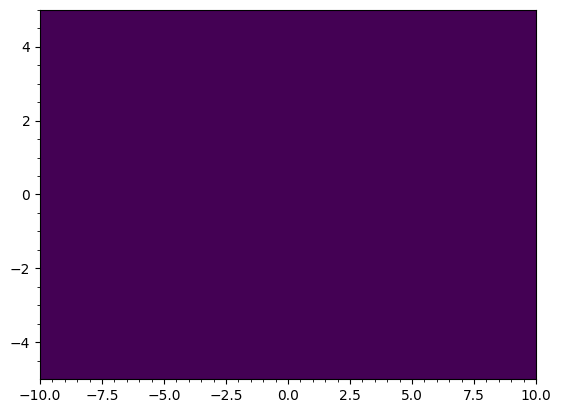


Fire two individual electrons at the screen.


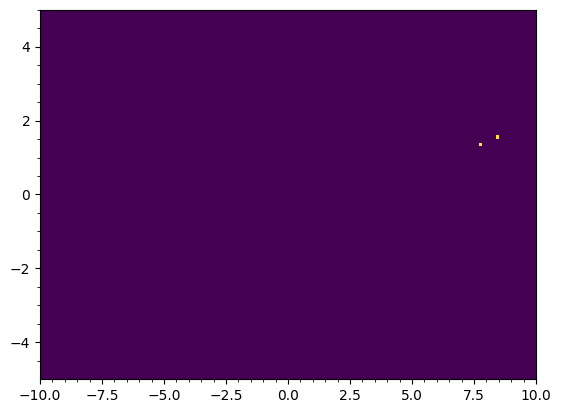


Fire 15,000 electrons at the screen.


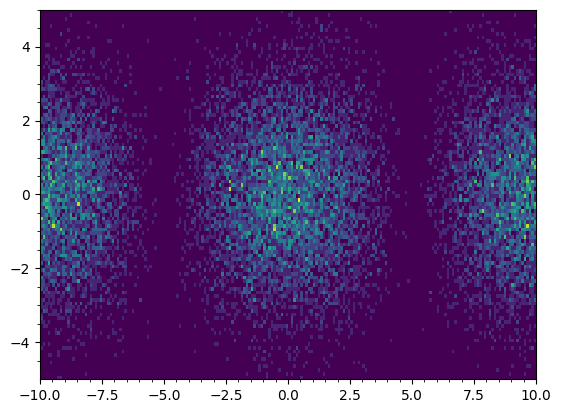


To determine position of slit: Measure the slit the electrons pass through and fire 15,000 electrons


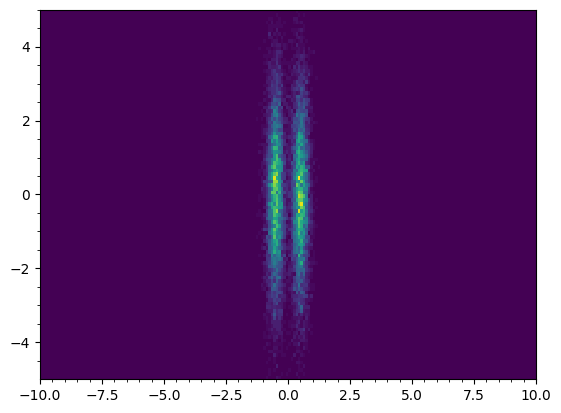

In [ ]:
#Experiment #2.1
"Creating a `doubleSlit` function and"
print("Displaying the blank screen")

my_experiment = doubleSlit()
my_experiment.show_screen()
print()

#Experiment #2.2
print("Fire two individual electrons at the screen.")
"Then, display the screen again."
my_experiment.fire_electron()
my_experiment.fire_electron()
my_experiment.show_screen()
print()

#Experiment #2.3
print("Fire 15,000 electrons at the screen.")
"Then display the screen."

my_experiment.electron_beam(num_electrons=15000)
my_experiment.show_screen()
print()

#Experiment #2.4
print("To determine position of slit: Measure the slit the electrons pass through and fire 15,000 electrons")
"Then display the screen."

my_experiment = doubleSlit(measure_slit=True)
my_experiment.electron_beam(num_electrons=15000)
my_experiment.show_screen()
print()


$Part\; 3: Modifying\; the\; Double\; Slit\; Experiment\; Simulator.$

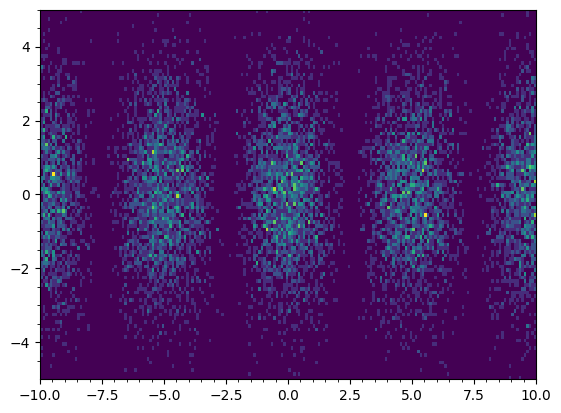

In [ ]:
#Basically, I'm trying to show how changing various fixed variables can alter the results of the experiment.

#Experiment #3.1
#Kinda like a test, and CONTROL EXPERIMENT: We will use the values derived from it later on in the calculations

#**NOTE** make sure to clear the screen! (Refer to the for loops written for the electron_beam function to better understand why)
my_experiment = doubleSlit()
my_experiment.slit_dist = 2
my_experiment.distance_to_screen = 10
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()
print()


$Changing\; the\; fixed\; values\; of\; the\; double-slit\; object\; to\; the\; following:\;$
`slit_dist` $\;of\; 2\; and\; a\;$ `distance_to_screen` $\;of\; 10.$


$Analyzing\; the\; effect\; of\; varying\; slit\; distance\; on\; interference\; patterns.$


INSTANCE A; slit distance= 5


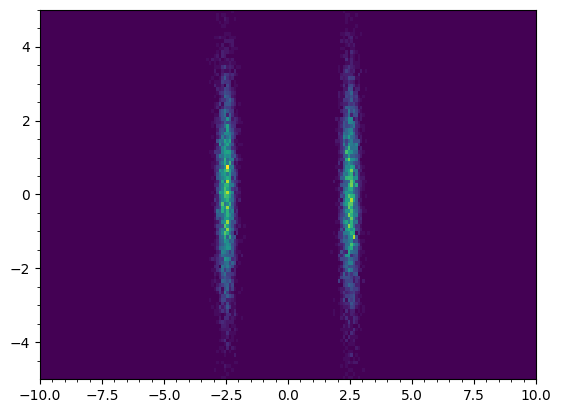

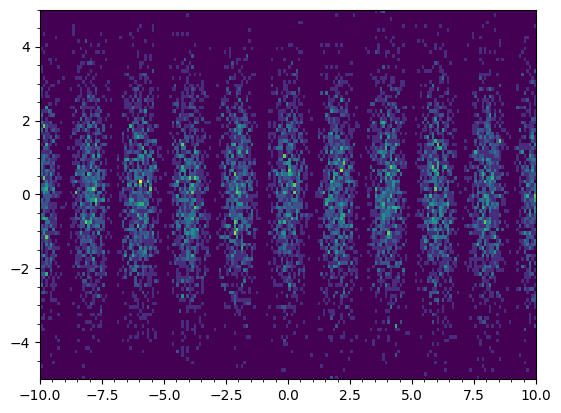


INSTANCE B; slit distance= 10


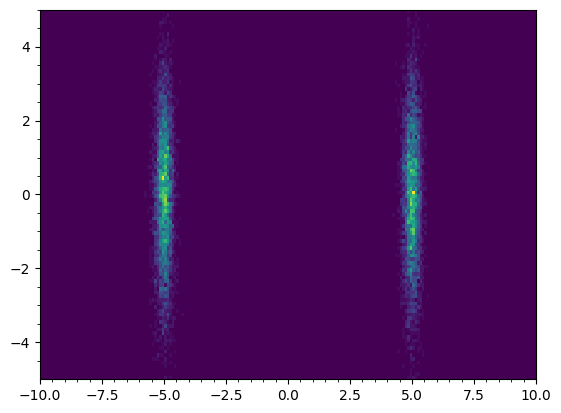

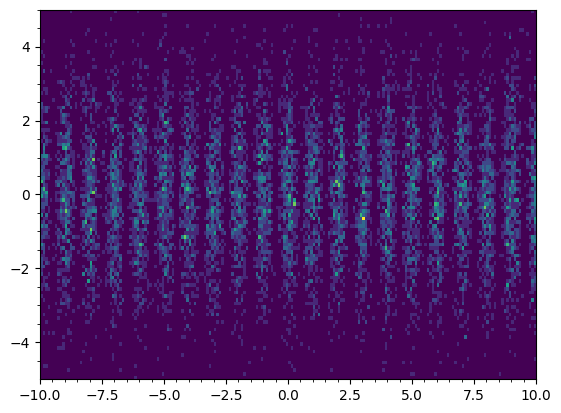


INSTANCE C; slit distance= 20


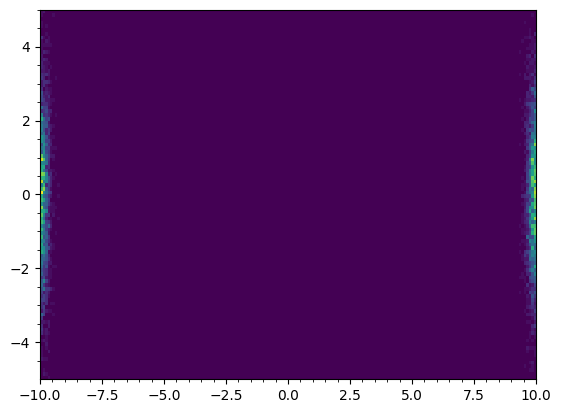

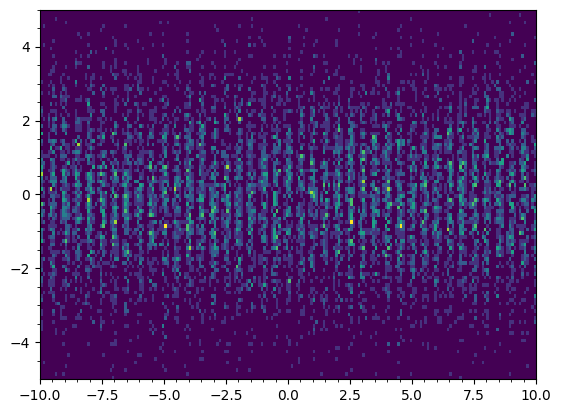

In [ ]:
#Experiment #3.2

#For each of them, 10,000 electrons have been fired, and their screen outputed
#For each 'INSTANCE', the first code-block contains the attribute 'measure_slit' to display the slits, while the second block displays the screen
print()
print('INSTANCE A; slit distance= 5')
my_experiment = doubleSlit()
my_experiment.measure_slit = True
my_experiment.slit_dist = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

my_experiment = doubleSlit()
my_experiment.slit_dist = 5
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()
print()

print('INSTANCE B; slit distance= 10')
my_experiment = doubleSlit()
my_experiment.measure_slit = True
my_experiment.slit_dist = 10
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

my_experiment = doubleSlit()
my_experiment.slit_dist = 10
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()
print()

print('INSTANCE C; slit distance= 20')
my_experiment = doubleSlit()
my_experiment.measure_slit = True
my_experiment.slit_dist = 20
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

my_experiment = doubleSlit()
my_experiment.slit_dist = 20
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()
print()

For any definite area on the screen,

$$d ∝ f$$

where

$d$ = distance between slits

$f$ = number of fringes on screen

Therefore,

$$f_2 = f_1 \cdot \frac{d_2}{d_1}$$

In [ ]:
#This section was written to test the results obtained mathematically against the simulator's results, to measure its accuracy.

#Using the values obtained from 'CONTROL EXPERIMENT' as f1 and d1
f0 = 4
d0 = 2

#Inputing the slit_distance of each instance?
d1 = int(input('What is the slit_distance of INSTANCE A? '))
d2 = int(input('What is the slit_distance of INSTANCE B? '))
d3 = int(input('What is the slit_distance of INSTANCE C? '))
print()

#Calculating a predicted value for the number of fringes shown on the screen
f1 = int(d1/d0 * f0)
f2 = int(d2/d0 * f0)
f3 = int(d3/d0 * f0)

#Importing pandas library
import pandas as pd

#Creating Data Frame(Table)
#The values under the [Experimental (Simulated)] column were obtained by counting the fringes shown on the screen.
#**NOTE**: Both 'half fringes' that sometimes appear at the edges of the screen were counted as one.
comparison_table = {
    'Mathematical (Predicted)': [10, 20, 40],
    'Experimental (Simulated)': [f1, f2, f3],
}
df = pd.DataFrame(comparison_table)
df.index = ['INSTANCE A', 'INSTANCE B', 'INSTANCE C']
df['Do the values correlate?'] = df.apply(lambda row: 'Yes!' if row['Mathematical (Predicted)'] == row['Experimental (Simulated)'] else 'No', axis = 1)

#Conditional statement to check if the simulator works, using the values displayed in the last column
yes = 'Yes!'
if (df['Do the values correlate?'] == yes).all():
    competency = 'The Simulator Works!'
else:
    competency = 'Stick to Biology mahn......'

print(competency)
df